In this example, we create a 1D regression model using a decision tree.

The tree is used to fit a noisy sine curve. The model will learn learn a local linear regression approximating the sine signal.

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [3]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

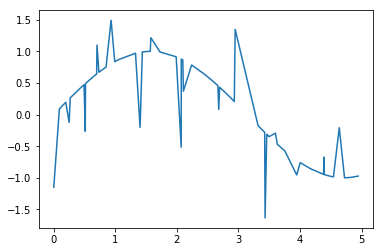

In [4]:
plt.figure()
plt.plot(X, y)
plt.show()

From the documentation:

class sklearn.tree.DecisionTreeRegressor(criterion=’mse’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)[source]

In [5]:
# Fit two regression models
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [6]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)



[[ 0.  ]
 [ 0.01]
 [ 0.02]
 [ 0.03]
 [ 0.04]
 [ 0.05]
 [ 0.06]
 [ 0.07]
 [ 0.08]
 [ 0.09]
 [ 0.1 ]
 [ 0.11]
 [ 0.12]
 [ 0.13]
 [ 0.14]
 [ 0.15]
 [ 0.16]
 [ 0.17]
 [ 0.18]
 [ 0.19]
 [ 0.2 ]
 [ 0.21]
 [ 0.22]
 [ 0.23]
 [ 0.24]
 [ 0.25]
 [ 0.26]
 [ 0.27]
 [ 0.28]
 [ 0.29]
 [ 0.3 ]
 [ 0.31]
 [ 0.32]
 [ 0.33]
 [ 0.34]
 [ 0.35]
 [ 0.36]
 [ 0.37]
 [ 0.38]
 [ 0.39]
 [ 0.4 ]
 [ 0.41]
 [ 0.42]
 [ 0.43]
 [ 0.44]
 [ 0.45]
 [ 0.46]
 [ 0.47]
 [ 0.48]
 [ 0.49]
 [ 0.5 ]
 [ 0.51]
 [ 0.52]
 [ 0.53]
 [ 0.54]
 [ 0.55]
 [ 0.56]
 [ 0.57]
 [ 0.58]
 [ 0.59]
 [ 0.6 ]
 [ 0.61]
 [ 0.62]
 [ 0.63]
 [ 0.64]
 [ 0.65]
 [ 0.66]
 [ 0.67]
 [ 0.68]
 [ 0.69]
 [ 0.7 ]
 [ 0.71]
 [ 0.72]
 [ 0.73]
 [ 0.74]
 [ 0.75]
 [ 0.76]
 [ 0.77]
 [ 0.78]
 [ 0.79]
 [ 0.8 ]
 [ 0.81]
 [ 0.82]
 [ 0.83]
 [ 0.84]
 [ 0.85]
 [ 0.86]
 [ 0.87]
 [ 0.88]
 [ 0.89]
 [ 0.9 ]
 [ 0.91]
 [ 0.92]
 [ 0.93]
 [ 0.94]
 [ 0.95]
 [ 0.96]
 [ 0.97]
 [ 0.98]
 [ 0.99]
 [ 1.  ]
 [ 1.01]
 [ 1.02]
 [ 1.03]
 [ 1.04]
 [ 1.05]
 [ 1.06]
 [ 1.07]
 [ 1.08]
 [ 1.09]
 [ 1.1 ]
 

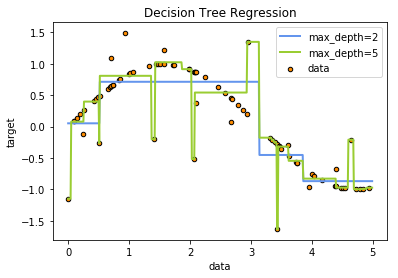

In [5]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.